In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos

In [2]:
pd.set_option('display.max_rows', None)
df = pd.read_csv("data/data-covid-limpio.csv")

C:\Users\NEIRA\AppData\Local\Temp\ipykernel_5508\305175325.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/data-covid-limpio.csv")


In [3]:
# Obtener información básica del DataFrame
df.info()s

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95315 entries, 0 to 95314
Data columns (total 99 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       95315 non-null  int64  
 1   ano                      95315 non-null  int64  
 2   semana                   95315 non-null  int64  
 3   fecha_not                95315 non-null  object 
 4   diresa                   95315 non-null  object 
 5   red                      95315 non-null  object 
 6   microred                 95315 non-null  object 
 7   establecimiento          95315 non-null  object 
 8   institucion              95315 non-null  object 
 9   clasificacion            95315 non-null  object 
 10  fecha_det                95315 non-null  object 
 11  nombre                   95315 non-null  object 
 12  edad                     95315 non-null  int64  
 13  tipo_edad                95315 non-null  object 
 14  sexo                  

In [4]:
# Definir los tipos de datos por grupo
tipo_datos = {
    'int': ['id', 'ano', 'semana', 'edad', 'trimestre', 'total_sintomas', 'total_contactos'],
    
    'float': ['temperatura'],
    
    'bool': ['fiebre', 'malestar', 'tos', 'garganta', 'congestion', 'respiratoria', 'diarrea', 'nauseas', 'cefalea', 'irritabilidad', 'muscular', 'abdominal', 'pecho', 'articulaciones', 'exudado', 'conjuntival', 'convulsion', 'coma', 'disnea', 'auscultacion', 'rxpulmonar', 'embarazo', 'cardiovascular', 'diabetes', 'hepatica', 'neurologica', 'inmunodeficiencia', 'renal', 'hepatico', 'pulmonar', 'cancer', 'contacto_salud', 'contacto_familiar', 'contacto_trabajo', 'contacto_desconocido', 'entorno_salud', 'entorno_familiar', 'entorno_trabajo', 'entorno_desconocido', 'tiene_sintomas', 'contacto_viaje', 'sintoma_grave'],
    
    'str': ['diresa', 'red', 'microred', 'establecimiento', 'institucion', 'clasificacion', 'nombre', 'tipo_edad', 'sexo', 'tipodoc', 'pais_residencia', 'departamento_residencia', 'provincia_residencia', 'residencia', 'ubigeo', 'etnia', 'direccion', 'hospitalizado', 'aislamiento', 'postparto', 'ocupacion', 'otra_ocupacion', 'viajado_14', 'pais_1', 'pais_2', 'pais_3', 'eess_14', 'contacto_14', 'confirmado_14', 'contacto_pais', 'mercado', 'mercado_pais', 'muestra_rap', 'prueba_rap', 'resultado_rap', 'grupo_etario', 'fecha_not', 'fecha_det', 'fecha_ini', 'fecha_hos', 'fecha_ais', 'fecha_def', 'fecha_mue', 'fecha_res', 'fecha_mue1', 'fecha_res1', 'fecha_rap', 'fecha_res_rap', 'fecha_rap1']
    
    #'date': ['fecha_not', 'fecha_det', 'fecha_ini', 'fecha_hos', 'fecha_ais', 'fecha_def', 'fecha_mue', 'fecha_res', 'fecha_mue1', 'fecha_res1', 'fecha_rap', 'fecha_res_rap', 'fecha_rap1']
}

In [5]:
# Convertir cada columna a su tipo de dato correspondiente
for tipo, columnas in tipo_datos.items():
    for col in columnas:
        df[col] = df[col].astype(tipo)

In [6]:
# Obtener las columnas numéricas
df_valores_numericas = df[tipo_datos['int']]
df_valores_numericas.head()

,id,ano,semana,edad,trimestre,total_sintomas,total_contactos
0,542,2021,5,31,0,2,0
1,1234,2020,10,53,0,7,0
2,1258,2020,10,47,0,2,0
3,1266,2020,10,76,0,5,0
4,1292,2021,9,49,0,4,0


# Eliminar valores atípicos

In [7]:
# Calcular cuartiles y rango intercuartílico
Q1 = df_valores_numericas.quantile(0.25)
Q3 = df_valores_numericas.quantile(0.75)
IQR = Q3 - Q1

*********************** id ***********************

Outlier mas bajo: 0 ****** Outlier superior: 0


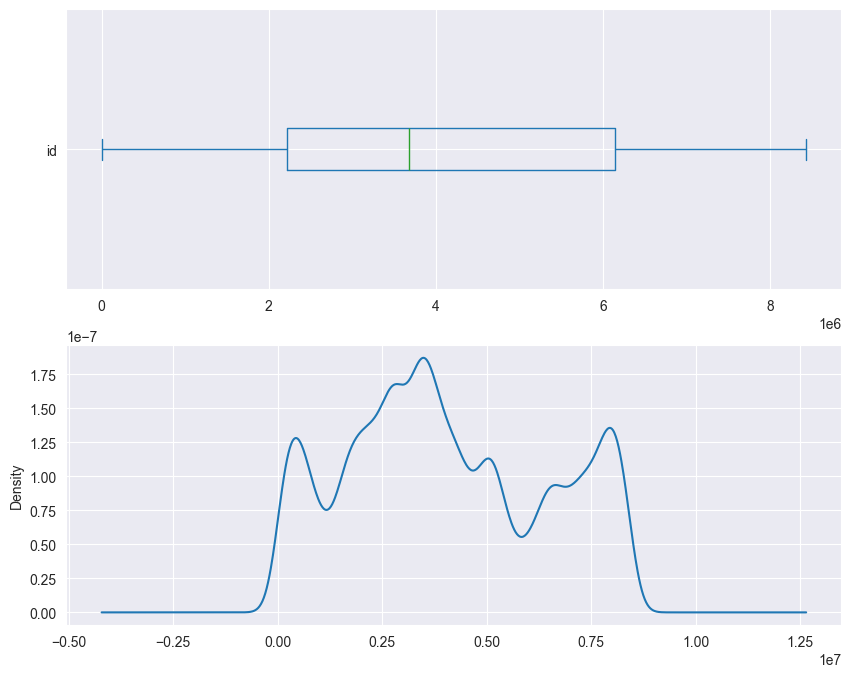

*********************** ano ***********************

Outlier mas bajo: 0 ****** Outlier superior: 0


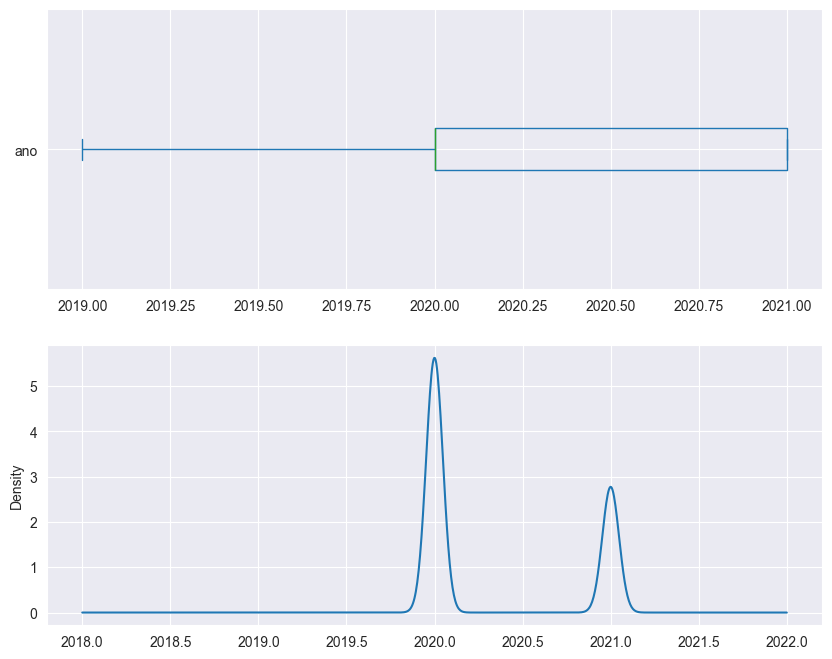

*********************** semana ***********************

Outlier mas bajo: 0 ****** Outlier superior: 0


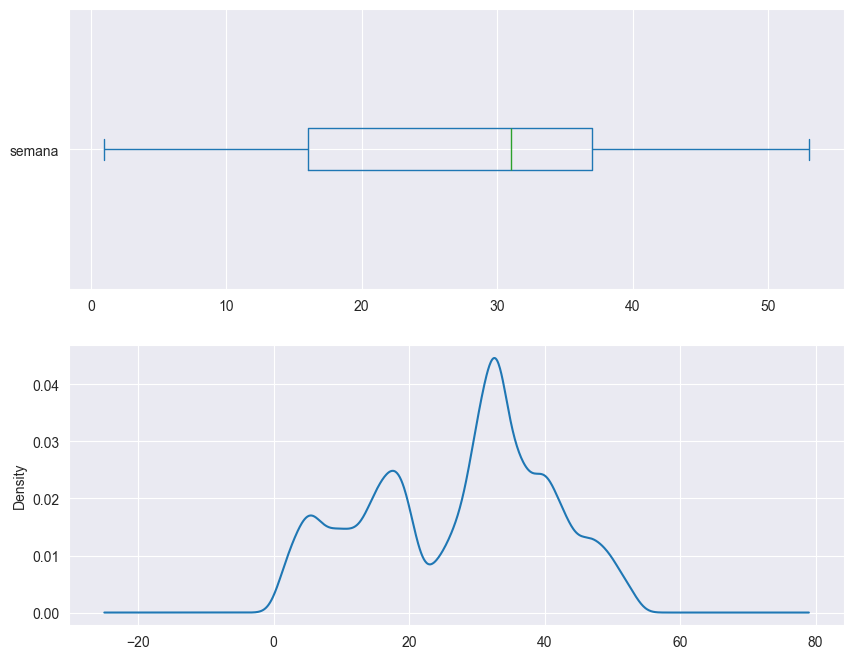

*********************** edad ***********************

Outlier mas bajo: 0 ****** Outlier superior: 187


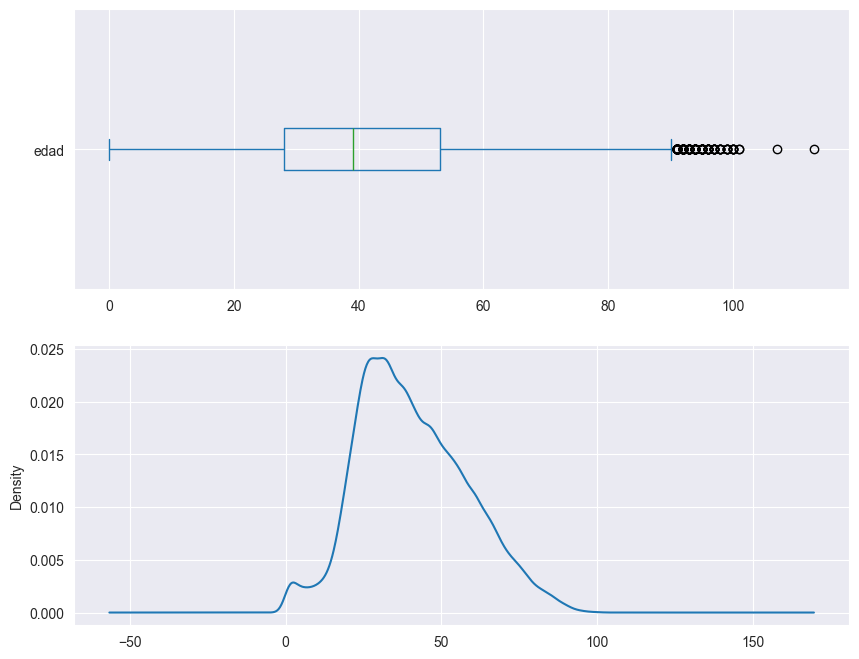

*********************** trimestre ***********************

Outlier mas bajo: 0 ****** Outlier superior: 2410


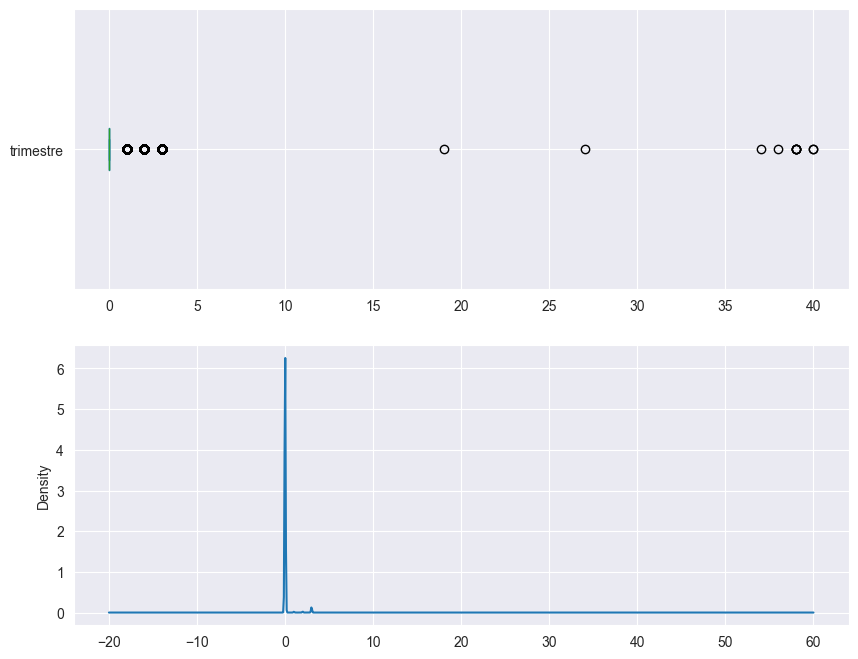

*********************** total_sintomas ***********************

Outlier mas bajo: 0 ****** Outlier superior: 1365


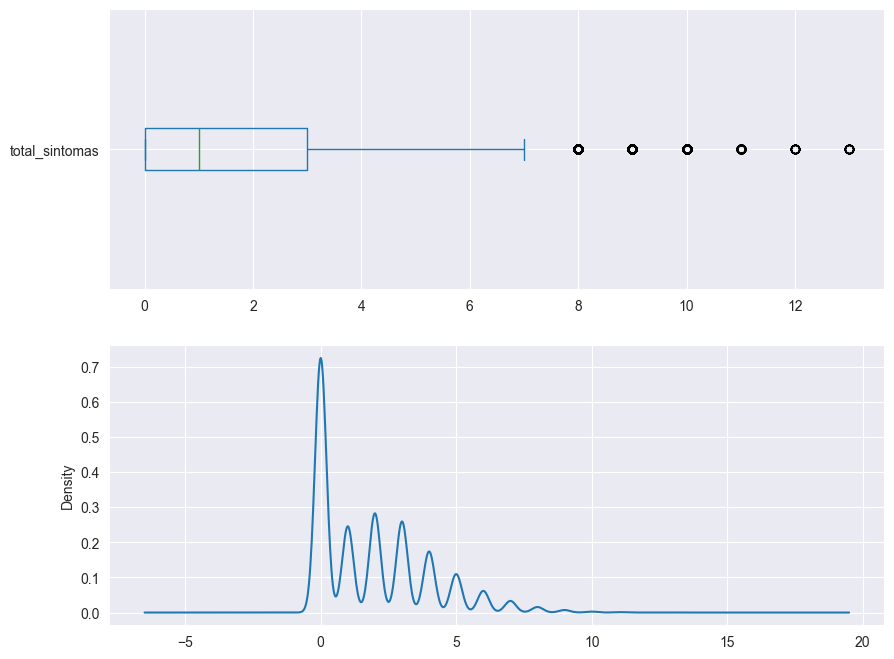

*********************** total_contactos ***********************

Outlier mas bajo: 0 ****** Outlier superior: 7440


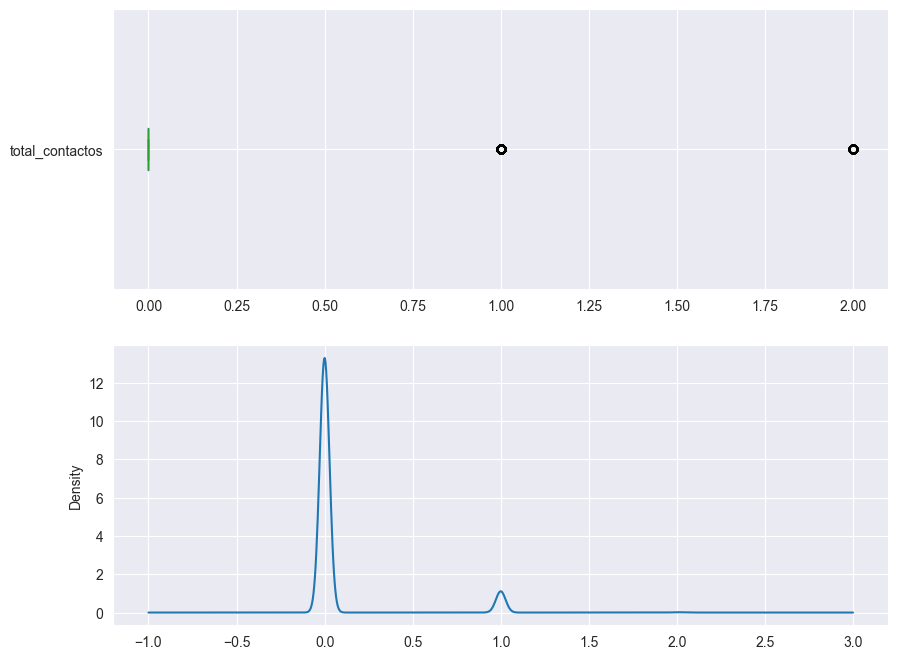

In [8]:
# Función para identificar outliers inferiores y superiores
def detectar_outliers(col2):
    inferior = df_valores_numericas[col2] < (Q1[col2] - 1.5 * IQR[col2])
    superior = df_valores_numericas[col2] > (Q3[col2] + 1.5 * IQR[col2])
    return inferior, superior

# Función para preprocesar cada columna numérica
def preprocesar(col3):
    print("*********************** {} ***********************\n".format(col3))
    inferior, superior = detectar_outliers(col3)
    print("Outlier mas bajo: {} ****** Outlier superior: {}\n".format(inferior.sum(), superior.sum()))
    plt.figure(figsize=(10,8))
    plt.subplot(2,1,1)
    df_valores_numericas[col3].plot(kind='box', subplots=True, sharex=False, vert=False)
    plt.subplot(2,1,2)
    df_valores_numericas[col3].plot(kind='density', subplots=True, sharex=False)
    plt.show()

# Iterar sobre todas las columnas numéricas para preprocesarlas
for col in df_valores_numericas:
    preprocesar(col)

In [9]:
col_outliers = ['trimestre']

In [10]:
# Función para identificar outliers inferiores y superiores y contarlos
def contar_outliers(col):
    inferior, superior = detectar_outliers(col)
    total_outliers = inferior.sum() + superior.sum()
    return total_outliers

# Iterar sobre todas las columnas numéricas para contar los outliers
for col in col_outliers:
    total_outliers = contar_outliers(col)
    print("Total de outliers en la columna {}: {}".format(col, total_outliers))


Total de outliers en la columna trimestre: 2410


In [11]:
# Eliminar filas con valores menores a 36 o mayores a 41 en la columna 'temperatura'
df = df[(df['temperatura'] > 34) & (df['temperatura'] < 43)]
df = df[df['edad'] <= 110]

In [12]:
# Función para eliminar filas que contienen outliers
def eliminar_filas_outliers(df, col):
    inferior, superior = detectar_outliers(col)  # Calcular outliers para la columna en el DataFrame
    outliers_index = df.loc[(inferior | superior)].index  # Obtener los índices de las filas con outliers
    df.drop(outliers_index, inplace=True)  # Eliminar las filas con outliers del DataFrame

# Iterar sobre todas las columnas numéricas para eliminar las filas con outliers
for col in col_outliers:
    eliminar_filas_outliers(df, col)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92817 entries, 0 to 95314
Data columns (total 99 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       92817 non-null  int32  
 1   ano                      92817 non-null  int32  
 2   semana                   92817 non-null  int32  
 3   fecha_not                92817 non-null  object 
 4   diresa                   92817 non-null  object 
 5   red                      92817 non-null  object 
 6   microred                 92817 non-null  object 
 7   establecimiento          92817 non-null  object 
 8   institucion              92817 non-null  object 
 9   clasificacion            92817 non-null  object 
 10  fecha_det                92817 non-null  object 
 11  nombre                   92817 non-null  object 
 12  edad                     92817 non-null  int32  
 13  tipo_edad                92817 non-null  object 
 14  sexo                     92

In [15]:
df.head(10)

,id,ano,semana,fecha_not,diresa,red,microred,establecimiento,institucion,clasificacion,...,prueba_rap,resultado_rap,fecha_res_rap,fecha_rap1,grupo_etario,total_sintomas,tiene_sintomas,total_contactos,contacto_viaje,sintoma_grave
0,542,2021,5,09-02-2021,PUNO,PUNO,SIN MICRORED,"HOSP. REG. ""MANUEL NUÑEZ BUTRÓN"" - PUNO",GOBIERNO REGIONAL,DESCARTADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Adultez,2,True,0,False,False
1,1234,2020,10,07-03-2020,PUNO,SAN ROMAN,SIN MICRORED,"HOSP. ""CARLOS MONGE MEDRANO"" - JULIACA",GOBIERNO REGIONAL,DESCARTADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Adultez,7,True,0,True,False
2,1258,2020,10,09-03-2020,PUNO,PUNO,SIN MICRORED,HOSPITAL III DE ESSALUD,ESSALUD,DESCARTADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Adultez,2,True,0,False,False
3,1266,2020,10,09-03-2020,PUNO,SAN ROMAN,SIN MICRORED,"HOSP. ""CARLOS MONGE MEDRANO"" - JULIACA",GOBIERNO REGIONAL,DESCARTADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Vejez,5,True,0,False,False
4,1292,2021,9,05-03-2021,PUNO,PUNO,METROPOLITANO,C.S. METROPOLITANO PUNO,GOBIERNO REGIONAL,CONFIRMADO,...,SEROLOGIA,NEGATIVO,16-07-2020,00-00-0000,Adultez,4,True,0,False,False
5,1309,2021,15,14-04-2021,PUNO,PUNO,SIN MICRORED,C.A.P. III METROPOLITANO PUNO - ESSALUD,ESSALUD,CONFIRMADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Adultez,2,True,0,False,False
6,1630,2021,5,19-02-2021,PUNO,PUNO,SIN MICRORED,C.A.P. III METROPOLITANO PUNO - ESSALUD,ESSALUD,DESCARTADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Adultez,2,True,0,True,False
7,1635,2020,51,25-01-2021,PUNO,PUNO,SIN MICRORED,C.A.P. III METROPOLITANO PUNO - ESSALUD,ESSALUD,DESCARTADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Adultez,2,True,0,True,False
8,1641,2020,10,16-03-2020,PUNO,SAN ROMAN,SIN MICRORED,"HOSP. ""CARLOS MONGE MEDRANO"" - JULIACA",GOBIERNO REGIONAL,DESCARTADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Adultez,9,True,0,False,True
9,2321,2020,10,09-03-2020,PUNO,PUNO,SIN MICRORED,HOSPITAL III DE ESSALUD,ESSALUD,DESCARTADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Adultez,3,True,0,False,False


In [16]:
# Guardar el DataFrame codificado en un nuevo archivo CSV
df.to_csv('data/data-covid-sin-outliers.csv', index=False)